# LINEAR REGRESSION
# APPLYING TRANSFORMATION TO MAKE TARGET VARIABLE BE MORE NORMALLY DISTRIBUTED
# APPLYING INVERSE TRANSFORMATION

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [13]:
#LOAD IN DATA

from sklearn.datasets import load_boston
boston_data=load_boston()

In [67]:
data = boston_data.data
target = boston.target
names = boston.feature_names

In [68]:
target =target.reshape(target.shape[0], -1)

In [76]:
#MERGE TARGET AND PREDICTABLE TO 1 ARRAY

data_all = np.concatenate([data, target], axis=1)
names_all = np.concatenate([names, np.array(['MEDV'])], axis=0)

In [95]:
#CONVERT TO DATA FRAME
boston=pd.DataFrame(data=data_all, columns=names_all)

# WE ARE TRYING TO PREDICT THE "MEDV" COLUMN [IT IS THE TARGET VARIABLE]

In [94]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


# DETERMINING NORMALITY


<h4>Making our target variabel normally distributed would lead to better results</h4>
<br/>
<h4>If our target variable is not normally distributed we can apply a transformation to it and then fot our regression line</h4>    
<br/>
<h5>
We can see if a target is normally distributed by two ways
</h5>
<ul>
<li>Visually</li>
<li>Using a statistical test</li>
</ul>

<h4>TARGET VARIABLES MAY OR MAY NOT BE NORMALLY DISTRIBUTES</h4>
<h4>ERRORS NEED TO BE NORMALLY DISTRIBUTED</h4>

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

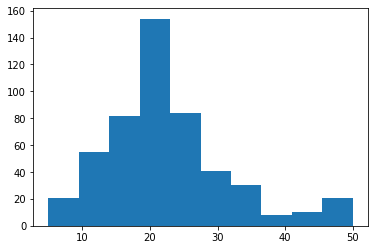

In [96]:
#VISUAL REPRESENTATION
#PLOT A HISTOGRAM

plt.hist(boston.MEDV)

In [99]:
#STATISTICAL TEST
#This test outputs p-value
#The higher the p-value , the closer the distribution is to normal

from scipy.stats.mstats import normaltest

In [106]:
normaltest(boston.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

<h4>LINEAR REGRESSION ASSUMES NORMALLY DISTRIBUTED RESIDUALS WHICH CAN BE AIDED BY TRANSFORMING y variables</h4>

<h5>FEW METHODS ARE</h5>
<ul>
<li>Log</li>
<li>Square Root</li>
<li>Box Cox</li>
</ul>

In [121]:
#LOG TRANSFORMATION

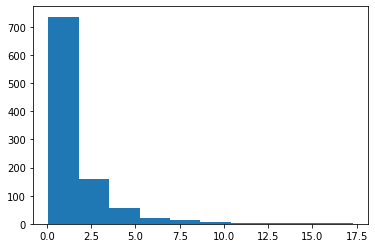

In [109]:
data=np.exp(np.random.normal(size=1000))
plt.hist(data)
plt.show()

(array([ 14.,  49.,  86., 197., 215., 198., 122.,  80.,  28.,  11.]),
 array([-2.63363162, -2.0853518 , -1.53707199, -0.98879218, -0.44051237,
         0.10776744,  0.65604725,  1.20432706,  1.75260687,  2.30088668,
         2.84916649]),
 <BarContainer object of 10 artists>)

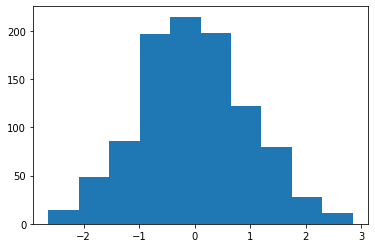

In [110]:
plt.hist(np.log(data))

<AxesSubplot:>

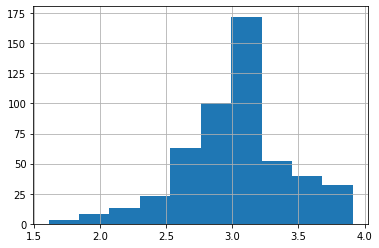

In [118]:
#APPLYING log transformation TO OUR TARGET COLUMN ["MEDV"]

log_medv=np.log(boston.MEDV)
log_medv.hist()

In [119]:
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640697, pvalue=0.00018245472768345307)

In [120]:
#SQUARE ROOT TRANSFORMATION 

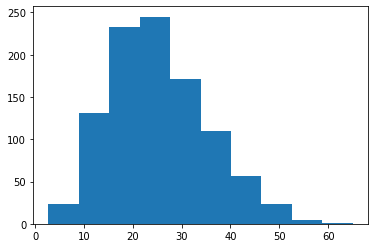

In [123]:
data = np.square(np.random.normal(loc=5, size=1000))
plt.hist(data)
plt.show()

(array([  7.,  13.,  64., 147., 248., 228., 171.,  91.,  26.,   5.]),
 array([1.64461409, 2.28674335, 2.9288726 , 3.57100186, 4.21313112,
        4.85526038, 5.49738964, 6.1395189 , 6.78164816, 7.42377742,
        8.06590668]),
 <BarContainer object of 10 artists>)

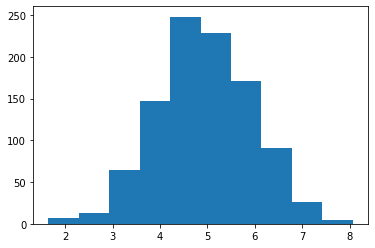

In [124]:
plt.hist(np.sqrt(data))

<AxesSubplot:>

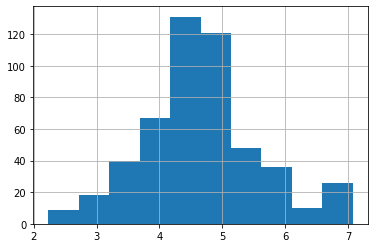

In [136]:
#apply to our target 

sqrt_medv=np.sqrt(boston.MEDV)
sqrt_medv.hist()

In [137]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

In [141]:
#BOX COX TRASNFORMATION
from scipy.stats import boxcox

bc_results=boxcox(boston.MEDV)
boxcox_medv=bc_results[0]
lambda_val=bc_results[1]

In [149]:
#BEFORE
print(boston.MEDV[1:10].values)

#AFTER TRANSFORMATION
#SEE FEW TRANSFORMED (FIRST 10)
boxcox_medv[1:10]

[21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


array([4.36558166, 5.33694273, 5.25495447, 5.42860689, 4.93592663,
       4.48001683, 4.81796329, 3.85654088, 4.10949441])

In [143]:
lambda_val

0.2166209012915364

(array([  4.,  15.,  17.,  49.,  68., 151.,  99.,  50.,  23.,  30.]),
 array([1.92564954, 2.3487372 , 2.77182485, 3.1949125 , 3.61800016,
        4.04108781, 4.46417546, 4.88726311, 5.31035077, 5.73343842,
        6.15652607]),
 <BarContainer object of 10 artists>)

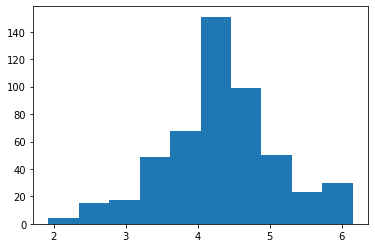

In [151]:
plt.hist(boxcox_medv)

In [153]:
normaltest(boxcox_medv)
#pvalue ABOVE 0.5

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

# TESTING REGRESSION

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,PolynomialFeatures)

In [157]:
lr=LinearRegression()
lr

LinearRegression()

In [161]:
#GET A FRESH COPY OF DATA AGAIN
boston=pd.DataFrame(data=data_all, columns=names_all)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Create X and y

In [165]:
y_col="MEDV" #target/ dependent variable
X=boston.drop(y_col,axis=1)
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [207]:
y=boston[y_col]

In [208]:
y.head(2)

0    24.0
1    21.6
Name: MEDV, dtype: float64

In [217]:
#CONVERT SERIES TO DATAFRAME
y=pd.DataFrame(y)
y.head(2)

,MEDV
0,24.0
1,21.6


In [218]:
#CREATE POLYNOMIAL FEATURES

pf=PolynomialFeatures(degree=2,include_bias=False)
X_pf=pf.fit_transform(X)

In [219]:
X_pf.shape

(506, 104)

# TRAIN AND TEST SPLIT

In [220]:
X_train,X_test,y_train,y_test=train_test_split(X_pf,y,test_size=0.3,random_state=72018)

In [221]:
#FIT STANDARD SCALER ON X_TRAIN as before
std_scaler=StandardScaler()
X_train_s=std_scaler.fit_transform(X_train)
X_train_s

array([[-0.0124666 , -0.48401192,  1.03845365, ..., -0.23484375,
        -0.91219534, -0.7707125 ],
       [-0.41008423,  0.38254628, -1.1262321 , ...,  0.43979833,
        -0.94167211, -0.80076846],
       [-0.40010802, -0.48401192, -0.14721377, ...,  0.49113324,
         0.86132485,  0.24960827],
       ...,
       [-0.39800149, -0.48401192, -0.60154862, ...,  0.27504228,
        -0.77435532, -0.7456282 ],
       [-0.38835496,  0.05758695, -0.46085138, ...,  0.44525464,
         1.49796212,  0.92512164],
       [-0.37704727, -0.48401192,  1.59391465, ...,  0.18154948,
         0.85751868,  0.34889333]])

# Apply the aprropriate transformation to use in target variable (we did it earlier)

In [259]:
bc_results=boxcox(y_train.MEDV)
lamda_2=bc_results[1]
y_train_bc=bc_results[0]

In [260]:
print(y_train_bc[1:10])
print(lamda_2)

[6.0629177  4.51310411 4.81957899 4.95725428 5.77277497 5.41197088
 5.75640624 3.72665146 4.94686892]
0.2751714409758365


In [ ]:
#FIT WITH LINEAR REGRESSION

In [235]:
lr.fit(X_train_s,y_train_bc)

LinearRegression()

In [237]:
X_test_s=std_scaler.transform(X_test)
y_pred_bc=lr.predict(X_test_s)

In [239]:
y_pred_bc.shape

(152,)

In [241]:
X_test_s.shape

(152, 104)

In [245]:
y_test.MEDV

502    20.6
127    16.2
390    15.1
303    33.1
277    33.1
       ... 
433    14.3
505    11.9
53     23.4
82     24.8
377    13.3
Name: MEDV, Length: 152, dtype: float64

In [246]:
y_pred_bc

array([4.43920316, 4.16230299, 4.14903773, 5.72770375, 5.70362608,
       6.59865445, 4.18842601, 4.77415222, 4.68282566, 4.85108878,
       6.82748198, 3.86236699, 5.0643167 , 4.31536775, 6.91107238,
       4.93538901, 4.64299542, 5.84297841, 5.24960436, 5.44823381,
       3.98464025, 4.88299011, 4.19919967, 3.59736013, 5.2309719 ,
       5.30478058, 5.85592444, 4.78820348, 4.78846728, 6.78622305,
       3.36299121, 4.39751616, 4.29381841, 6.9642437 , 4.49873355,
       5.51107039, 4.79092744, 5.61456675, 3.04824493, 5.35252088,
       3.34764987, 3.97589975, 5.14213658, 4.37539217, 5.07041151,
       6.31192606, 4.90476787, 5.25799412, 5.69133946, 4.21362253,
       5.2252357 , 5.49371642, 4.38650851, 3.95353734, 4.16951912,
       2.75465746, 4.06367514, 3.01030741, 4.5542641 , 4.8090537 ,
       5.74517281, 3.26233918, 3.5862807 , 6.17670312, 4.23677257,
       5.81985343, 3.41296646, 3.83284203, 4.98192021, 5.73417989,
       5.20709227, 5.2224684 , 5.25901124, 5.43662547, 3.82631

# INVERSE TRANFORMATION

In [249]:
from scipy.special import inv_boxcox

In [253]:
bc_result=boxcox(boston.MEDV)
boxcov_medv=bc_result[0]
lamda=bc_result[1]

In [258]:
#lets see the first 10
inv_boxcox(boxcov_medv,lamda)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [262]:
y_pred_tran=inv_boxcox(y_pred_bc,lamda_2)
r2_score(y_pred_tran,y_test)

0.8794001851338588

# Determine if R^2 of a LinearRegression without the box cox transformation higer or lower

In [266]:
lr=LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred=lr.predict(X_test_s)
r2_score(lr_pred,y_test)

0.8555202098064159